In [89]:
# import libraries

import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Census County Data

In [90]:
# read us counties file
us_counties = gpd.read_file('../Data/tl_2022_us_county/tl_2022_us_county.shp')

In [91]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [92]:
# filter counties to only include oregon
or_counties = us_counties.loc[us_counties['STATEFP'] == '41'].to_crs('EPSG:32610')

In [93]:
or_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
18,41,063,01155135,41063,Wallowa,Wallowa County,06,H1,G4020,NaN,NaN,NaN,A,8147835328,14191752,+45.5937530,-117.1855796,"POLYGON ((951271.626 5008172.487, 951272.326 5..."
87,41,013,01155128,41013,Crook,Crook County,06,H1,G4020,NaN,NaN,NaN,A,7715390857,21004473,+44.1630537,-120.3715849,"POLYGON ((730696.277 4924633.426, 732156.897 4..."
123,41,005,01155127,41005,Clackamas,Clackamas County,06,H1,G4020,NaN,NaN,NaN,A,4845115802,31863504,+45.1604934,-122.1951274,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
171,41,007,01135846,41007,Clatsop,Clatsop County,06,H1,G4020,NaN,NaN,NaN,A,2144781264,661720213,+46.0245094,-123.7050366,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
202,41,035,01155134,41035,Klamath,Klamath County,06,H1,G4020,NaN,NaN,NaN,A,15410373388,484953082,+42.6837613,-121.6461682,"POLYGON ((558461.584 4751172.166, 558550.065 4..."


# Census Tract Data

In [94]:
# read oregon census tract file
or_tract = gpd.read_file('../Data/tl_2022_41_tract/tl_2022_41_tract.shp')

In [95]:
or_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,41,015,950302,41015950302,9503.02,Census Tract 9503.02,G5020,S,8831275,4126242,+42.0628105,-124.2960404,"POLYGON ((-124.32851 42.06741, -124.32813 42.0..."
1,41,015,950301,41015950301,9503.01,Census Tract 9503.01,G5020,S,1471037379,24387422,+42.2661637,-124.1650816,"POLYGON ((-124.41779 42.25254, -124.41661 42.2..."
2,41,015,950100,41015950100,9501,Census Tract 9501,G5020,S,1690327400,98894328,+42.7148490,-124.1810565,"POLYGON ((-124.61952 42.80166, -124.61858 42.8..."
3,41,011,000702,41011000702,7.02,Census Tract 7.02,G5020,S,28036755,980057,+43.3160168,-124.2282540,"POLYGON ((-124.26404 43.29416, -124.26391 43.2..."
4,41,011,001102,41011001102,11.02,Census Tract 11.02,G5020,S,680843621,2235826,+43.1317684,-123.9875674,"POLYGON ((-124.35057 43.12684, -124.35054 43.1..."


# Merge County Data

In [96]:
# read internet county speed data from NTIA csv file
county_data_df = pd.read_csv('../Data/broadband_counties.csv')

In [97]:
county_data_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
0,1,1001,Autauga County,Alabama,21559,366,8.6,1.005340,15.3,1.841693,...,2.138023,110.944000,11.835,56145.0,85.347031,17.304867,0.8057,0.391,249970.1918,2.208588e+09
1,2,1003,Baldwin County,Alabama,84047,1143,8.2,0.794065,11.9,1.054878,...,0.999039,40.535999,13.101,229287.0,29.566347,5.575569,0.8362,0.452,537587.2607,5.911175e+09
2,3,1005,Barbour County,Alabama,9322,338,20.2,2.613101,29.0,2.871257,...,2.897247,45.056000,10.854,24589.0,56.418366,8.076088,0.6891,0.324,320882.8479,3.257907e+09
3,4,1007,Bibb County,Alabama,7259,299,16.8,3.850855,20.9,3.362702,...,3.614489,22.660999,4.546,22136.0,16.868685,6.865757,0.3368,0.136,227920.0610,2.311978e+09
4,5,1009,Blount County,Alabama,21205,430,15.0,1.636814,18.5,1.949670,...,1.571379,36.444000,9.309,57879.0,26.013332,4.149326,0.7580,0.199,292630.2869,2.456904e+09


In [98]:
# filter counties to only include oregon
or_county_df = county_data_df[county_data_df['State'] == 'Oregon']

In [99]:
or_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
2207,2208,41001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,2.523116,25.309999,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10
2208,2209,41003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,1.320246,81.684998,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09
2209,2210,41005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,0.504855,101.217003,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09
2210,2211,41007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,1.239517,38.249001,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09
2211,2212,41009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,1.346453,55.771000,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09


In [100]:
# create matching columns to merge datasets
or_county_df['Geographic Identifier - FIPS Code'] = or_county_df['Geographic Identifier - FIPS Code'].astype(str).str[2:]

/var/folders/9_/7w6dl5dd3z718l85r306bpmr0000gn/T/ipykernel_66251/2840755677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_county_df['Geographic Identifier - FIPS Code'] = or_county_df['Geographic Identifier - FIPS Code'].astype(str).str[2:]


In [101]:
or_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
2207,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,2.523116,25.309999,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10
2208,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,1.320246,81.684998,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09
2209,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,0.504855,101.217003,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09
2210,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,1.239517,38.249001,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09
2211,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,1.346453,55.771000,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09


In [102]:
# merge the county data frame and county geodata frame
merged_county_df = pd.merge(or_county_df, or_counties[['COUNTYFP','geometry']], left_on='Geographic Identifier - FIPS Code', right_on='COUNTYFP')

In [103]:
merged_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."


In [104]:
# convert pandas data frame to geopandas data frame
merged_county_gdf = gpd.GeoDataFrame(merged_county_df, geometry='geometry')

In [105]:
merged_county_gdf.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."


# Merge Tract Data

In [106]:
# read internet tract speed data from NTIA file
tract_data_df = pd.read_csv('../Data/broadband_tracts.csv')

In [107]:
# filter tracts to only include oregon
or_tract_df = tract_data_df[tract_data_df['State'] == 'Oregon']

In [108]:
or_tract_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length
21650,21651,41003000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,1.861138,14.4,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07
21651,21652,41003000900,Census Tract 9,Oregon,Benton County,2570,243,1.2,1.318345,1.2,1.318345,15.0,5.538008,1200.0,50.0,102.272003,6.279,5741.0,20490.445590,1.891101e+07
21652,21653,41003001001,Census Tract 10.01,Oregon,Benton County,1767,171,5.8,2.772856,6.9,3.040060,25.2,7.067309,1200.0,940.0,68.652000,5.990,3979.0,9583.734089,3.232659e+06
21653,21654,41003001002,Census Tract 10.02,Oregon,Benton County,1327,126,4.1,3.974535,5.1,4.191902,19.3,6.972464,1200.0,940.0,130.837997,10.781,3258.0,7595.785067,3.265330e+06
21654,21655,41003001101,Census Tract 11.01,Oregon,Benton County,1351,171,2.9,2.863533,8.4,4.539254,54.4,11.882873,1200.0,940.0,74.942001,6.287,3743.0,4747.330396,1.318794e+06


In [109]:
# create matching columns to merge datasets
or_tract_df['Geographic Identifier - FIPS Code'] = or_tract_df['Geographic Identifier - FIPS Code'].astype(str).str[5:]

/var/folders/9_/7w6dl5dd3z718l85r306bpmr0000gn/T/ipykernel_66251/2798129607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_tract_df['Geographic Identifier - FIPS Code'] = or_tract_df['Geographic Identifier - FIPS Code'].astype(str).str[5:]


In [110]:
or_tract_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length
21650,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,1.861138,14.4,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07
21651,21652,000900,Census Tract 9,Oregon,Benton County,2570,243,1.2,1.318345,1.2,1.318345,15.0,5.538008,1200.0,50.0,102.272003,6.279,5741.0,20490.445590,1.891101e+07
21652,21653,001001,Census Tract 10.01,Oregon,Benton County,1767,171,5.8,2.772856,6.9,3.040060,25.2,7.067309,1200.0,940.0,68.652000,5.990,3979.0,9583.734089,3.232659e+06
21653,21654,001002,Census Tract 10.02,Oregon,Benton County,1327,126,4.1,3.974535,5.1,4.191902,19.3,6.972464,1200.0,940.0,130.837997,10.781,3258.0,7595.785067,3.265330e+06
21654,21655,001101,Census Tract 11.01,Oregon,Benton County,1351,171,2.9,2.863533,8.4,4.539254,54.4,11.882873,1200.0,940.0,74.942001,6.287,3743.0,4747.330396,1.318794e+06


In [111]:
# merge the tract data frame and tract geodata frame
merged_tract_df = pd.merge(or_tract_df, or_tract[['TRACTCE','geometry']], left_on='Geographic Identifier - FIPS Code', right_on='TRACTCE')

In [112]:
# convert pandas data frame to geopandas data frame
merged_tract_gdf = gpd.GeoDataFrame(merged_tract_df, geometry='geometry')

In [113]:
merged_tract_gdf.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length,TRACTCE,geometry
0,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."
1,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-123.34435 44.53982, -123.34398 44.5..."
2,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.89365 42.32367, -122.89259 42.3..."
3,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.65115 45.49033, -122.65038 45.4..."
4,21695,000202,Census Tract 2.02,Oregon,Jackson County,1334,241,4.4,2.656030,7.8,...,7.062268,1000.0,940.0,94.164001,11.254,3798.0,6838.304926,1.891918e+06,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."


# County Statistics and Map

In [114]:
# show county table
merged_county_gdf

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443000,16284.0,38.818657,8.091613,0.7059,0.380,7.813253e+05,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762000,93239.0,67.522560,5.884386,0.9951,0.747,3.299889e+05,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575000,421585.0,59.254623,6.928912,0.9695,0.804,5.189721e+05,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942000,40423.0,64.503746,10.204513,0.8239,0.788,3.590914e+05,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247000,52876.0,25.950663,3.338619,0.8067,0.277,2.572159e+05,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."
5,2213,011,Coos County,Oregon,27819,496,11.6,1.644232,15.3,1.947198,...,11.309000,64711.0,54.330952,9.747436,0.8966,0.622,4.502786e+05,7.926573e+09,011,"POLYGON ((392581.336 4817180.567, 392509.627 4..."
6,2214,013,Crook County,Oregon,9998,285,8.0,2.047716,13.6,2.642066,...,4.582000,25104.0,32.322701,4.422442,0.9163,0.371,5.908937e+05,1.502659e+10,013,"POLYGON ((730696.277 4924633.426, 732156.897 4..."
7,2215,015,Curry County,Oregon,10790,349,10.5,2.441696,16.4,3.293963,...,9.754000,23304.0,58.226631,8.529182,0.9423,0.517,5.767959e+05,7.790687e+09,015,"POLYGON ((360630.431 4736723.091, 360717.049 4..."
8,2216,017,Deschutes County,Oregon,77040,740,4.6,0.795739,7.8,1.070817,...,7.158000,201756.0,60.746330,5.480547,0.9745,0.693,7.382864e+05,1.524792e+10,017,"POLYGON ((651669.282 4892658.938, 651675.599 4..."
9,2217,019,Douglas County,Oregon,46439,556,10.3,1.063144,14.1,1.163531,...,11.363000,111363.0,50.236408,10.228702,0.9300,0.635,9.263910e+05,2.478613e+10,019,"POLYGON ((558419.332 4767312.628, 558420.678 4..."


In [115]:
# sort data to create table that shows fastest to slowest internet speeds in counties
avg_d_sorted = merged_county_gdf.sort_values(by='Ookla Median Download Speed (Mbps)', ascending = False)

avg_d_table = avg_d_sorted[['Name', 'Ookla Median Download Speed (Mbps)']]

print(avg_d_table)

                 Name  Ookla Median Download Speed (Mbps)
33  Washington County                          107.811997
2    Clackamas County                          101.217003
25   Multnomah County                           99.085999
26        Polk County                           88.588997
23      Marion County                           84.906998
1       Benton County                           81.684998
19        Lane County                           77.870003
21        Linn County                           71.089996
14     Jackson County                           68.585999
9      Douglas County                           65.352997
35     Yamhill County                           65.046997
5         Coos County                           57.354000
4     Columbia County                           55.771000
28   Tillamook County                           53.567001
8    Deschutes County                           52.459999
29    Umatilla County                           46.659000
32       Wasco

In [118]:
# county statistics
merged_county_gdf['Ookla Median Download Speed (Mbps)'].describe()

count     36.000000
mean      48.172722
std       27.198935
min        9.743000
25%       22.568251
50%       42.296000
75%       66.161247
max      107.811997
Name: Ookla Median Download Speed (Mbps), dtype: float64

In [120]:
# map the counties
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 75 Mbps", "75 to 100 Mbps", "100 to 125 Mbps"]

merged_county_gdf['group'] = pd.cut(merged_county_gdf['Ookla Median Download Speed (Mbps)'],
                                   (0, 25, 50, 75, 100, 125), right=False, labels=labels)

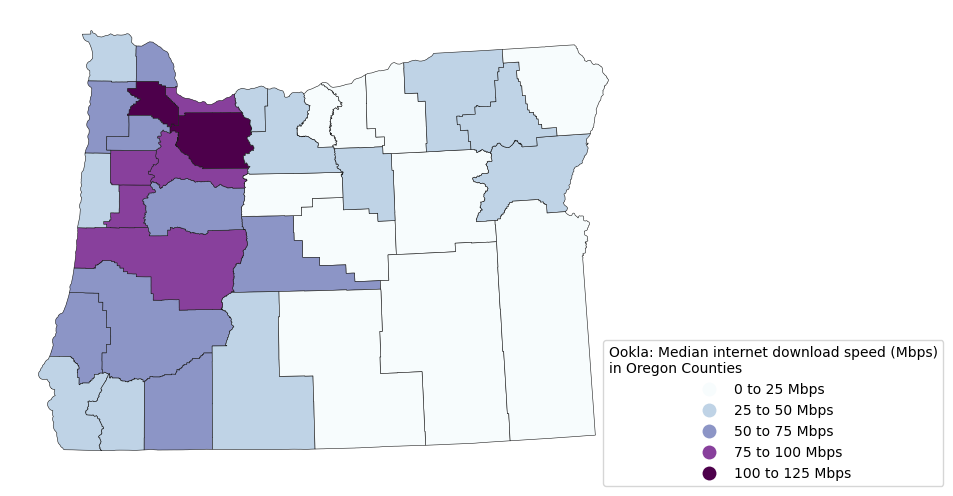

In [121]:
fig, ax = plt.subplots(1, figsize=(16, 6))

merged_county_gdf.plot(column='group', cmap='BuPu', linewidth=0.4, ax=ax, edgecolor='0.1', legend=True)

ax.axis('off')

legend = ax.get_legend()
legend.set_bbox_to_anchor((1.5, 0.3))
legend.set_title('Ookla: Median internet download speed (Mbps)\nin Oregon Counties')

In [122]:
# save map to asset folder
fig.savefig('assets/or_county_speeds.png', dpi=300, bbox_inches='tight')

# Tract Map

In [123]:
# show tract table
merged_tract_gdf

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length,TRACTCE,geometry
0,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."
1,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-123.34435 44.53982, -123.34398 44.5..."
2,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.89365 42.32367, -122.89259 42.3..."
3,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.65115 45.49033, -122.65038 45.4..."
4,21695,000202,Census Tract 2.02,Oregon,Jackson County,1334,241,4.4,2.656030,7.8,...,7.062268,1000.0,940.0,94.164001,11.254,3798.0,6838.304926,1.891918e+06,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,78547,033202,Census Tract 332.02,Oregon,Washington County,954,146,2.4,4.281827,2.4,...,8.650568,NaN,NaN,NaN,NaN,NaN,16858.109090,1.433703e+07,033202,"POLYGON ((-123.11205 45.51992, -123.11205 45.5..."
1952,78548,030303,Census Tract 303.03,Oregon,Yamhill County,1345,124,6.7,5.616781,7.0,...,1.727172,NaN,NaN,NaN,NaN,NaN,30432.562780,2.366731e+07,030303,"POLYGON ((-123.03488 45.28354, -123.03485 45.2..."
1953,78549,030304,Census Tract 303.04,Oregon,Yamhill County,2098,228,2.4,1.744463,7.6,...,7.778100,NaN,NaN,NaN,NaN,NaN,54372.010960,1.148623e+08,030304,"POLYGON ((-123.12252 45.24365, -123.12248 45.2..."
1954,78550,030703,Census Tract 307.03,Oregon,Yamhill County,1805,218,1.9,1.980663,4.6,...,5.129715,NaN,NaN,NaN,NaN,NaN,18803.522970,6.342057e+06,030703,"POLYGON ((-123.23138 45.22978, -123.23114 45.2..."


In [124]:
# map the tracts
labels_tract = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 75 Mbps", "75 to 100 Mbps", "100 to 125 Mbps"]

merged_tract_gdf['group'] = pd.cut(merged_tract_gdf['Ookla Median Download Speed (Mbps)'],
                                   (0, 25, 50, 75, 100, 125), right=False, labels=labels_tract)

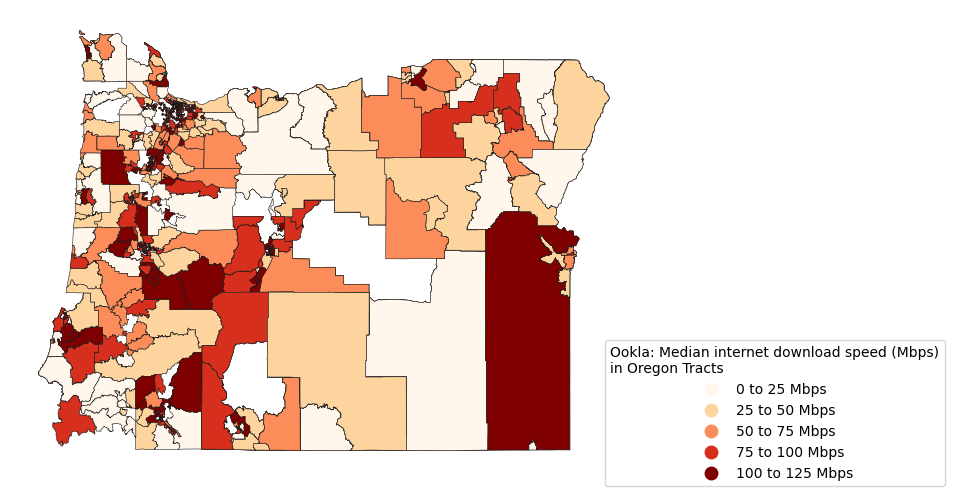

In [125]:
fig, ax = plt.subplots(1, figsize=(16, 6))

merged_tract_gdf.plot(column='group', cmap='OrRd', linewidth=0.4, ax=ax, edgecolor='0.1', legend=True)

ax.axis('off')

legend = ax.get_legend()
legend.set_bbox_to_anchor((1.5, 0.3))
legend.set_title('Ookla: Median internet download speed (Mbps)\nin Oregon Tracts')

In [126]:
# save map to asset folder
fig.savefig('assets/or_tract_speeds.png', dpi=300, bbox_inches='tight')

# Rural-Urban County Codes

In [127]:
# read rural-urban county code file
rural_urban_df = pd.read_csv('../Data/ruralurbancodes.csv')

In [128]:
rural_urban_df.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013
0,1001.0,AL,Autauga County,"54,571",2.0
1,1003.0,AL,Baldwin County,"182,265",3.0
2,1005.0,AL,Barbour County,"27,457",6.0
3,1007.0,AL,Bibb County,"22,915",1.0
4,1009.0,AL,Blount County,"57,322",1.0


In [129]:
# filter oregon
or_rural_urban_df = rural_urban_df[rural_urban_df['State'] == 'OR']

In [130]:
or_rural_urban_df.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013
2208,41001.0,OR,Baker County,"16,134",7.0
2209,41003.0,OR,Benton County,"85,579",3.0
2210,41005.0,OR,Clackamas County,"375,992",1.0
2211,41007.0,OR,Clatsop County,"37,039",4.0
2212,41009.0,OR,Columbia County,"49,351",1.0


In [131]:
# create matching columns to merge datasets
or_rural_urban_df['FIPS'] = or_rural_urban_df['FIPS'].astype(str).str[2:-2]

/var/folders/9_/7w6dl5dd3z718l85r306bpmr0000gn/T/ipykernel_66251/1585283888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_rural_urban_df['FIPS'] = or_rural_urban_df['FIPS'].astype(str).str[2:-2]


In [132]:
or_rural_urban_df.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013
2208,001,OR,Baker County,"16,134",7.0
2209,003,OR,Benton County,"85,579",3.0
2210,005,OR,Clackamas County,"375,992",1.0
2211,007,OR,Clatsop County,"37,039",4.0
2212,009,OR,Columbia County,"49,351",1.0


In [133]:
# add the rural urban code column to counties data frame
county_codes = pd.merge(merged_county_df, or_rural_urban_df[['FIPS', 'RUCC_2013']], left_on='COUNTYFP', right_on='FIPS')

In [134]:
# convert pandas data frame to geopandas data frame
county_codes_gdf = gpd.GeoDataFrame(county_codes, geometry='geometry')

In [135]:
county_codes_gdf.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry,group,FIPS,RUCC_2013
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,8.091613,0.7059,0.380,781325.3229,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4...",25 to 50 Mbps,001,7.0
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,5.884386,0.9951,0.747,329988.9263,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4...",75 to 100 Mbps,003,3.0
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,6.928912,0.9695,0.804,518972.0915,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5...",100 to 125 Mbps,005,1.0
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,10.204513,0.8239,0.788,359091.4438,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5...",25 to 50 Mbps,007,4.0
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,3.338619,0.8067,0.277,257215.9178,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5...",50 to 75 Mbps,009,1.0


In [136]:
# filter to include only urban/metropolitan counties
urban_counties = county_codes_gdf[(county_codes_gdf['RUCC_2013'] == 1) | 
                                  (county_codes_gdf['RUCC_2013'] == 2) |
                                  (county_codes_gdf['RUCC_2013'] == 3)]

In [137]:
# get statistics of median download speeds in urban counties
urban_counties['Ookla Median Download Speed (Mbps)'].describe()

count     13.000000
mean      75.968614
std       21.263237
min       33.472000
25%       65.046997
50%       77.870003
75%       88.588997
max      107.811997
Name: Ookla Median Download Speed (Mbps), dtype: float64

In [138]:
# filter to include only rural counties
rural_counties = county_codes_gdf[(county_codes_gdf['RUCC_2013'] == 8) | 
                                  (county_codes_gdf['RUCC_2013'] == 9)]

In [139]:
# get statistics of median download speeds in rural counties
rural_counties['Ookla Median Download Speed (Mbps)'].describe()

count     5.000000
mean     22.210000
std       6.414361
min      14.074000
25%      20.372000
50%      22.056999
75%      22.599001
max      31.948000
Name: Ookla Median Download Speed (Mbps), dtype: float64

In [140]:
rural_counties.describe()

,OBJECTID,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,RUCC_2013
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000e+00,5.0
mean,2230.600000,1789.800000,94.200000,10.780000,3.850966,16.060000,4.463586,12.840000,3.884845,22.210000,7.172800,3904.800000,38.917473,21.582561,0.592100,0.229400,559119.277940,1.186129e+10,9.0
std,11.326959,1406.185336,46.644399,2.716063,1.440065,2.779029,1.210812,2.871063,1.244028,6.414361,2.965152,2997.909305,19.629053,17.412191,0.224059,0.131978,139214.203494,7.800377e+09,0.0
min,2218.000000,669.000000,55.000000,6.500000,2.641580,12.900000,3.153840,9.700000,2.268641,14.074000,3.934000,1387.000000,13.250363,2.609279,0.379700,0.082000,442511.206500,4.367031e+09,9.0
25%,2219.000000,727.000000,61.000000,10.400000,2.846876,14.400000,3.503661,10.000000,3.371314,20.372000,4.880000,1801.000000,25.025145,10.296326,0.474950,0.149000,444061.052700,6.418683e+09,9.0
50%,2235.000000,905.000000,65.000000,11.300000,3.088992,15.200000,4.405730,13.600000,3.600493,22.056999,6.547000,1975.000000,44.134632,17.817953,0.541800,0.190000,529900.909200,8.808117e+09,9.0
75%,2239.000000,3195.000000,140.000000,11.800000,4.699519,18.100000,5.119741,14.800000,4.691994,22.599001,10.060000,7180.000000,50.068367,30.458895,0.658950,0.317000,600672.851800,1.665984e+10,9.0
max,2242.000000,3453.000000,150.000000,13.900000,5.977864,19.700000,6.134957,16.100000,5.491782,31.948000,10.443000,7181.000000,62.108860,46.730354,0.905100,0.409000,778450.369500,2.305279e+10,9.0


In [141]:
urban_counties.describe()

,OBJECTID,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,RUCC_2013
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000
mean,2225.461538,105232.769231,672.769231,5.769231,0.743609,8.592308,0.948466,12.623077,1.023981,75.968614,11.128385,273625.307692,47.976499,6.557057,0.941031,0.671692,479449.137362,8.322797e+09,2.000000
std,11.251780,92818.909143,262.492906,1.603322,0.325086,2.253317,0.440796,3.282822,0.363765,21.263237,3.487610,232402.897577,17.312399,2.578555,0.058387,0.151552,189139.851537,6.127350e+09,0.912871
min,2209.000000,19872.000000,326.000000,3.200000,0.282283,4.700000,0.329939,7.500000,0.504855,33.472000,6.247000,52876.000000,16.202690,3.338619,0.806700,0.277000,257215.917800,2.456172e+09,1.000000
25%,2216.000000,36606.000000,461.000000,4.900000,0.502913,7.500000,0.535112,10.000000,0.691222,65.046997,8.762000,93239.000000,40.512077,5.480547,0.927000,0.615000,337067.833500,3.751654e+09,1.000000
50%,2227.000000,77040.000000,657.000000,5.600000,0.795739,8.300000,0.919896,12.300000,1.067157,77.870003,10.803000,201756.000000,45.165977,5.884386,0.969500,0.693000,448834.368300,6.150685e+09,2.000000
75%,2233.000000,154516.000000,787.000000,6.500000,0.870414,10.000000,1.304137,13.700000,1.320246,88.588997,12.578000,382984.000000,60.746330,7.251232,0.974600,0.792000,602203.378800,1.175051e+10,3.000000
max,2243.000000,334849.000000,1194.000000,8.800000,1.327413,12.700000,1.657366,18.600000,1.561605,107.811997,18.252001,815631.000000,68.566750,12.210973,0.995100,0.830000,881861.088800,2.308263e+10,3.000000
